<a href="https://colab.research.google.com/github/rajeshmay09/MalariaTransfer1/blob/main/CNNMODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization ,Activation

In [ ]:
train_path = '/content/drive/MyDrive/TRAIN'
test_path = '/content/drive/MyDrive/TEST'

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10,
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest' 
                              )

In [ ]:
input_size = (130,130,3)
batch_size = 64

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=input_size[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 40000 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=input_size[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 10000 images belonging to 2 classes.


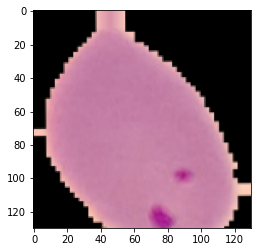

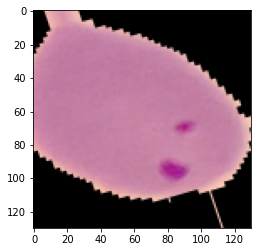

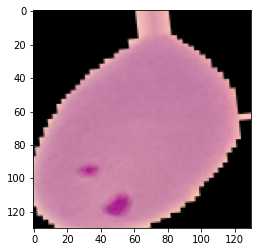

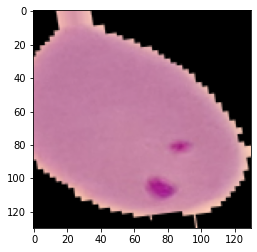

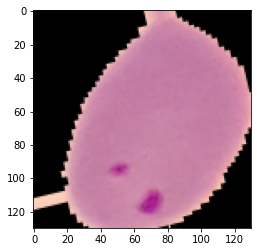

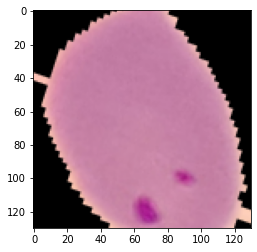

In [ ]:
img_path = '/content/drive/MyDrive/TEST/Parasitized/C116P77ThinF_IMG_20150930_171558_cell_121.png'
img = image.load_img(img_path, target_size=(130,130))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in image_gen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [ ]:
#Creating the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_size, activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_size, activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_size, activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)      

In [ ]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_image_gen,
                              epochs=25,
                              validation_data=test_image_gen,
                              steps_per_epoch=len(train_image_gen),
                              validation_steps=len(test_image_gen)
                             )

Epoch 1/25
625/625 [==============================] - 1106s 133ms/step - loss: 0.2947 - accuracy: 0.7848 - val_loss: 0.4073 - val_accuracy: 0.8290
Epoch 2/25
625/625 [==============================] - 693s 131ms/step - loss: 0.2795 - accuracy: 0.8382 - val_loss: 0.3590 - val_accuracy: 0.8623
Epoch 3/25
625/625 [==============================] - 295s 134ms/step - loss: 0.2754 - accuracy: 0.8778 - val_loss: 0.2183 - val_accuracy: 0.9110
Epoch 4/25
625/625 [==============================] - 296s 131ms/step - loss: 0.2904 - accuracy: 0.9208 - val_loss: 0.2088 - val_accuracy: 0.9250
Epoch 5/25
625/625 [==============================] - 295s 131ms/step - loss: 0.1894 - accuracy: 0.9328 - val_loss: 0.1979 - val_accuracy: 0.9309
Epoch 6/25
625/625 [==============================] - 292s 132ms/step - loss: 0.2484 - accuracy: 0.9281 - val_loss: 0.2152 - val_accuracy: 0.9361
Epoch 7/25
625/625 [==============================] - 289s 133ms/step - loss: 0.2605 - accuracy: 0.9237 - val_loss: 0.2264 

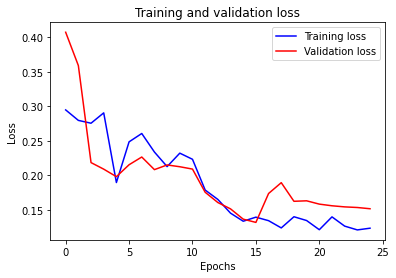

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc ="upper right")
plt.show()

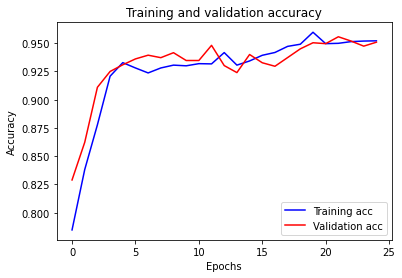

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc, 'y', label='Training acc')
plt.plot(val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc ="lower right")
plt.show()

In [ ]:
from keras.models import load_model
model.save('/content/CNN_malaria.h5')

**Prediction**

In [ ]:
classes = {
    0 :"parasitized_cell",
    1 : "uninfected_cell"


}

In [ ]:
img2='/content/drive/MyDrive/TEST/Uninfected/C1_thinF_IMG_20150604_104722_cell_73000 (4280)4.png'

In [ ]:
custom = image.load_img(img2, target_size=(130,130,3))

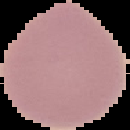

In [ ]:
custom

In [ ]:
import numpy as np

In [ ]:
custom_arrayformat = image.img_to_array(custom)

#adding extra dimension
custom_arrayformat = np.expand_dims(custom , axis=0)

In [ ]:
predict = model.predict(custom_arrayformat)
predict = int(predict)
classes[predict]

1/1 [==============================] - 0s 454ms/step


'uninfected_cell'

In [ ]:
img5='/content/drive/MyDrive/TEST/Parasitized/C116P77ThinF_IMG_20150930_171739_cell_92.png'

In [ ]:
custom1 = image.load_img(img5, target_size=(130,130,3))

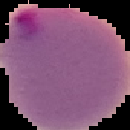

In [ ]:
custom1

In [ ]:
custom_arrayformat = image.img_to_array(custom1)

#adding extra dimension
custom_arrayformat = np.expand_dims(custom1 , axis=0)

In [ ]:
predict = model.predict(custom_arrayformat)
predict = int(predict)
classes[predict]

1/1 [==============================] - 0s 26ms/step


'parasitized_cell'

**CLASSIFICATION REPORT**

In [ ]:

predictions = model.predict(test_image_gen)

625/625 [==============================] - 120s 191ms/step


In [ ]:
predictions

array([[3.5418209e-02],
       [4.4799745e-03],
       [1.0202642e-07],
       ...,
       [6.0363764e-01],
       [9.9706149e-01],
       [9.9616188e-01]], dtype=float32)

In [ ]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = predictions > 0.8
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5000
           1       0.98      0.89      0.93      5000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
print(confusion_matrix(test_image_gen.classes,predictions))

[[4891  109]
 [ 534 4466]]
